Estimated mass: 0.9632124687318773 kg
Estimated spring constant: 99.9770862884538 N/m
Estimated damping constant: 2.961971412888429 Ns/m


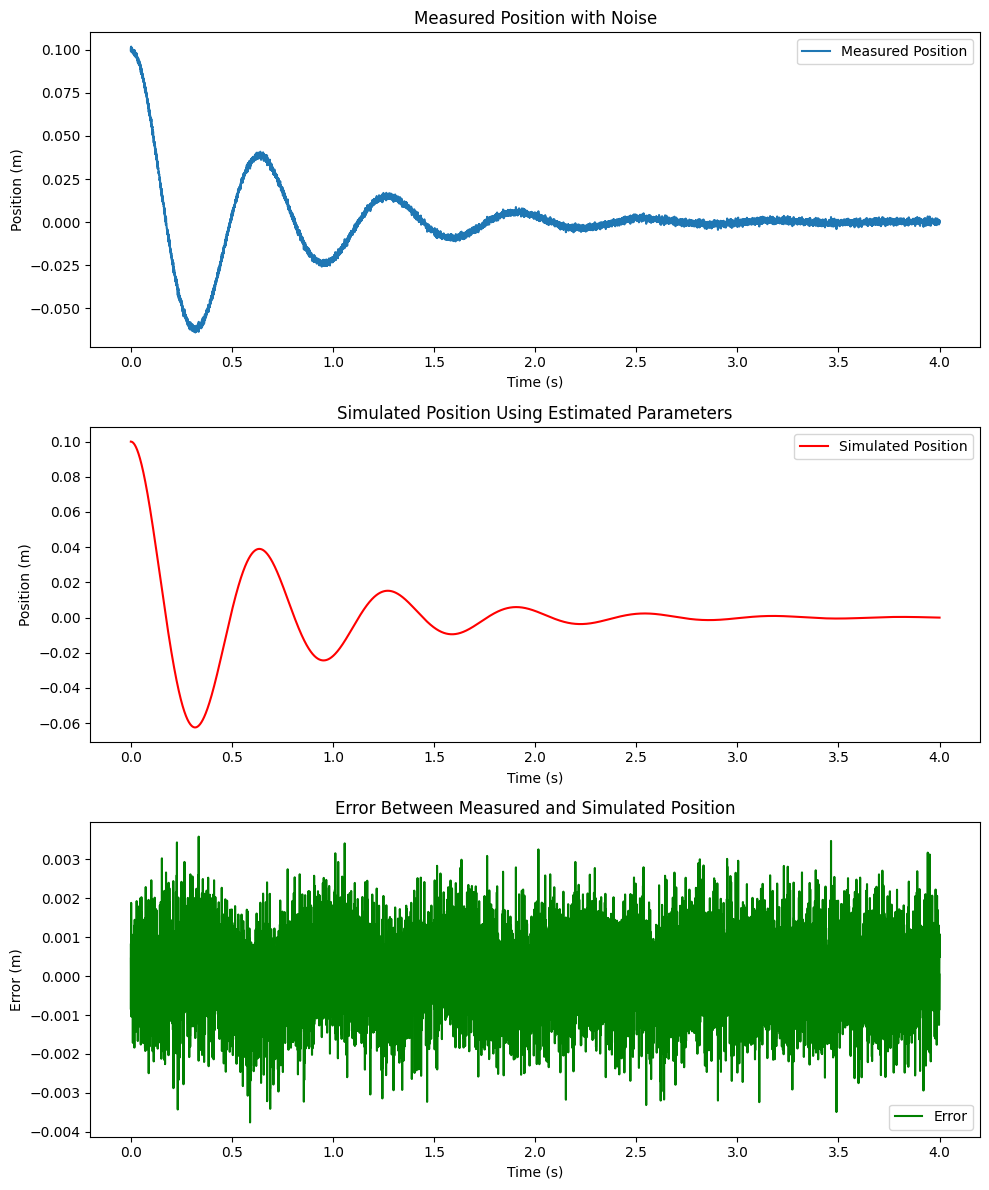

In [0]:
# Import necessary libraries for numerical computations and plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import least_squares

# System parameters
mass = 1.0  # Mass in kilograms
spring_constant = 100.0  # Spring constant in Newtons per meter (N/m)
damping_constant = 3.0  # Damping constant in Newton-seconds per meter (Ns/m)

# Coefficients for the differential equation
coeff_mass = mass
coeff_damping = damping_constant
coeff_spring = spring_constant

# Function to calculate the derivative of the state vector
def state_derivative(state, time, spring, damping, mass):
    derivative = np.zeros_like(state)
    derivative[0] = state[1]
    derivative[1] = -spring/mass * state[0] - damping/mass * state[1]
    return derivative

# Function to calculate residuals: the difference between simulated and actual positions
def residuals(parameters, time, actual_position):
    spring, damping, mass = parameters
    simulated_position = odeint(state_derivative, [0.1, 0.0], time, args=(spring, damping, mass))[:, 0]
    return simulated_position - actual_position

# Time span and true position data
time_span = np.linspace(0, 4, 10000)
true_position = odeint(state_derivative, [0.1, 0.0], time_span, args=(coeff_spring, coeff_damping, coeff_mass))[:, 0]

# Optionally add noise to the true position data
true_position += np.random.randn(len(true_position)) * 0.001

# Initialize guess for the parameters
initial_parameters = np.array([coeff_spring, coeff_damping, coeff_mass])

# Add a random offset to each element in the initial_parameters array using a uniform distribution
random_offsets = np.random.uniform(0, 1, initial_parameters.shape)
initial_parameters += random_offsets

# Define and solve the optimization problem to estimate parameters
optimization_result = least_squares(residuals, initial_parameters, args=(time_span, true_position))

# Extract the estimated parameters
estimated_spring, estimated_damping, estimated_mass = optimization_result.x

# Calculating estimated mass
estimated_mass_value = 1.0 / estimated_mass

# Output the results
print("Estimated mass:", estimated_mass_value, "kg")
print("Estimated spring constant:", estimated_spring * estimated_mass_value, "N/m")
print("Estimated damping constant:", estimated_damping * estimated_mass_value, "Ns/m")

# Visualization with subplots for measured position, simulated position, and the error between them
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot measured position with noise
axes[0].plot(time_span, true_position, label="Measured Position")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Position (m)")
axes[0].legend()
axes[0].set_title("Measured Position with Noise")

# Plot simulated position using estimated parameters
simulated_position_estimated = odeint(state_derivative, [0.1, 0.0], time_span, args=(estimated_spring, estimated_damping, estimated_mass))[:, 0]
axes[1].plot(time_span, simulated_position_estimated, 'r', label="Simulated Position")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Position (m)")
axes[1].legend()
axes[1].set_title("Simulated Position Using Estimated Parameters")

# Plot the error between measured and simulated positions
error = true_position - simulated_position_estimated
axes[2].plot(time_span, error, 'g', label="Error")
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Error (m)")
axes[2].legend()
axes[2].set_title("Error Between Measured and Simulated Position")

plt.tight_layout()
plt.show()
